<a href="https://colab.research.google.com/github/VidhiMistry11/ML/blob/main/degreesem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/loan_approval_dataset.csv")
print(df.head(5))

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [17]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [18]:
obj = (df.dtypes == 'object')

print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 3


In [19]:
print(df.keys())

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


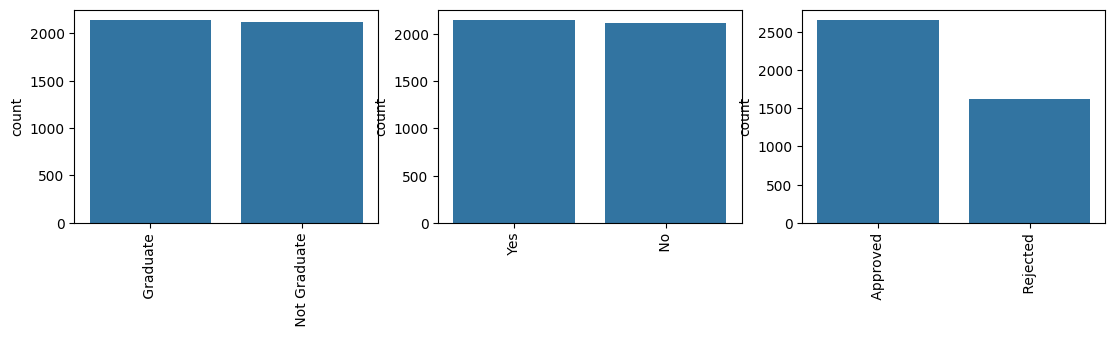

In [20]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [21]:
from sklearn import preprocessing
# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])
print("label encoding")

label encoding


In [22]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [15]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [29]:
from sklearn.model_selection import train_test_split
X = df.drop([' loan_status'],axis=1)
Y = df[' loan_status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2561, 12), (1708, 12), (2561,), (1708,))

In [31]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))


Accuracy score of  RandomForestClassifier = 97.48243559718969
Accuracy score of  KNeighborsClassifier = 55.67915690866511
Accuracy score of  SVC = 62.880562060889936
Accuracy score of  LogisticRegression = 65.04683840749415


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# SAVE ALL TRAINED MODELS
import joblib
joblib.dump(rfc, "rfc_model.pkl")
print("✔ model saved successfully!")

# INSTALL & IMPORT WIDGET LIBRARIES FOR COLAB UI
!pip install ipywidgets
from ipywidgets import widgets, VBox, HBox, Button
from IPython.display import display
import pandas as pd

rfc_model = joblib.load("rfc_model.pkl")
print("✔ Model loaded successfully!")

# CREATE INPUT WIDGETS FOR NEW PREDICTION
loan_id = widgets.Text(description="Loan ID")
no_of_dependents = widgets.IntSlider(description="Dependents", min=0, max=10)
education = widgets.Dropdown(
    description="Education",
    options=["Graduate", "Not Graduate"]
)
self_employed = widgets.Dropdown(
    description="Self Employed",
    options=["Yes", "No"]
)
income_annum = widgets.IntText(description="Annual Income")
loan_amount = widgets.IntText(description="Loan Amount")
loan_term = widgets.Dropdown(
    description="Loan Term",
    options=[12, 24, 36, 60, 120, 180, 240, 360]
)
cibil_score = widgets.IntSlider(description="CIBIL Score", min=300, max=900)
residential = widgets.IntText(description="Residential Asset")
commercial = widgets.IntText(description="Commercial Asset")
luxury = widgets.IntText(description="Luxury Asset")
bank_asset = widgets.IntText(description="Bank Asset Value")

predict_btn = Button(description="Predict Loan Status", button_style='success')
output = widgets.Output()

def predict_loan_status(b):
    output.clear_output()
    with output:
        # Convert inputs to DataFrame format
        data = pd.DataFrame({
            "loan_id":[loan_id.value],
            " no_of_dependents":[no_of_dependents.value],
            " education":[1 if education.value=="Graduate" else 0],
            " self_employed":[1 if self_employed.value=="Yes" else 0],
            " income_annum":[income_annum.value],
            " loan_amount":[loan_amount.value],
            " loan_term":[loan_term.value],
            " cibil_score":[cibil_score.value],
            " residential_assets_value":[residential.value],
            " commercial_assets_value":[commercial.value],
            " luxury_assets_value":[luxury.value],
            " bank_asset_value":[bank_asset.value]
        })

        # Model predictions
        pred_rfc = rfc_model.predict(data)[0]

        print("Loan Status Prediction Results")
        print("-----------------------------------")
        print("🌳 Random Forest:", pred_rfc)


predict_btn.on_click(predict_loan_status)

display(
    VBox([
        loan_id,
        no_of_dependents,
        education,
        self_employed,
        income_annum,
        loan_amount,
        loan_term,
        cibil_score,
        residential,
        commercial,
        luxury,
        bank_asset,
        predict_btn,
        output
    ])
)

✔ model saved successfully!
✔ Model loaded successfully!
